<a href="https://colab.research.google.com/github/SUMIT2925/Aerofit---Descriptive-Statistics-Probability/blob/main/Aerofit_Descriptive_Statistics_%26_Probability_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case: Aerofit - Descriptive Statistics & Probability

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

### Business Problem :
Identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.

* Investigate whether there are differences across the product with respect to customer characteristics.
1. Descriptive analytics to create a customer profile for each AeroFit treadmill product.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

### Dataset

Dataset contains following columns

* **Product Purchased** : KP281, KP481 and KP781, are the 3 different types of treadmills that are purchased by customers
* **Age** : In years, age of the customer who purchased
* **Gender** : Gender of the purchased customer
* **Education** : represented in years
* **Marital Status** : Single or partnered
* **Usage** : The average number of times the customer has planned to use the treadmill each week
* **Fitness** : Self rated fitness of the user rated from 1 (as poor shape) to 5 (as excellent shape)
* **Miles** : The average number of miles the customer expects to walk or run each week
* **Income** : Annual income of the user in Dollars $

**Analysing basic metrics**

In [ ]:
# Importing Different Libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings #to ignore the warnings & make our code more representable
warnings.filterwarnings("ignore")

In [ ]:
# Loading Of Dataset
df = pd.read_csv("/content/Aerofit_Treadmill_Sumit_Awasthi.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.shape # To Observe The Shape Of Data

(180, 9)

Dataset is of 180 rows and 9 attributes.

In [ ]:
df.info() # To Observe The Data Type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# Statistical summary

In [ ]:
df.describe()  # To generate statistical summary of numerical column

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Conclusion**
* Age: An average age of approximately 28 years, half of the customer's mean age is 26.The youngest person is 18 years old, while the oldest is 50 years old.
* Education: The education level of the individuals.Mean Education level is 15 years with maximum as 21 and minimum as 12.
* Usage: Mean value of approximately 3.46
* Fitness: Average rating is 3.3 on a scale of 1 to 5.
* Income (in $): The average income is approximately 53,719.58. The lowest income recorded is 29,562, while the highest income is 104,581.
* Miles: Miles represents a measure, which has a mean value of approximately 103.19 with the maximum distance recorded is approximately 115 miles, while the minimum distance is 21 miles.

In [ ]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [ ]:
df.isnull().sum() # Missing or null values in data

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There are no missing values in the data.

In [ ]:
# For unique list of products, listed in percentage
productuni = df['Product'].value_counts(normalize=True)
prod = productuni.map(lambda calc: round(100*calc,2))
prod

KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

* Among the customers:
    * 44.44% purchased the KP281 product type.
    * 33.33% purchased the KP481 product type.
    * 22.22% purchased the KP781 product type.
* These percentages represent the proportion of customers who bought each specific product type.

In [ ]:
# Customer Gender statistics (listed in %)
gender = df['Gender'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
gender.columns = ['Gender', 'Count']
gender

,Gender,Count
0,Male,57.78
1,Female,42.22


* 57.78% of customers are Male and 42.22% customers are Female

In [ ]:
# Customers Marital Status (listed in %)
maritals = df['MaritalStatus'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
maritals.columns = ['MaritalStatus', 'Count']
maritals

,MaritalStatus,Count
0,Partnered,59.44
1,Single,40.56


* Two categories of MaritalStatus:
    1. Partnered
    2. Single
* 59.44% are categorized as "Partnered" and 40.56% are categorized as "Single"

In [ ]:
# Usage: Number of days used per week (listed in %)
usage = df['Usage'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
usage.columns = ['Days Per Week', 'Usage']
usage

,Days Per Week,Usage
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


* Highest percentage of usage is 3 days per weeks.

In [ ]:
# Customer rating of their fitness (listed in %)
fitness = df['Fitness'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
fitness.columns = ['Rating', 'Fitness']
fitness

,Rating,Fitness
0,3,53.89
1,5,17.22
2,2,14.44
3,4,13.33
4,1,1.11


* It appears that the majority of individuals have a moderate fitness rating percentage is 3, while a low fitness rating percentage is 1.

# Non-Graphical Analysis

In [ ]:
# Total no. of unique product
df['Product'].nunique()

3

In [ ]:
df['Product'].unique().tolist()

['KP281', 'KP481', 'KP781']

* Three different types of Product
    1. KP281
    2. KP481
    3. KP781

In [ ]:
# Total no. of unique ages
age = df['Age'].nunique()
age

32

In [ ]:
genderc = df['Gender'].value_counts().reset_index()
genderc.columns = ['Gender', 'Count']
genderc

,Gender,Count
0,Male,104
1,Female,76


* 104 customers are male and 76 customers are female

In [ ]:
Fitnessc = df['Fitness'].value_counts().reset_index()
Fitnessc.columns = ['Fitness', 'Count']
Fitnessc

,Fitness,Count
0,3,97
1,5,31
2,2,26
3,4,24
4,1,2


* The fitness rating of 3 is the highest value among the provided ratings.

In [ ]:
Productc= df['Product'].value_counts().reset_index()
Productc.columns = ['Product', 'Count']
Productc

,Product,Count
0,KP281,80
1,KP481,60
2,KP781,40


* Highest purchased product is KP281

In [ ]:
Usagec = df['Usage'].value_counts().reset_index()
Usagec.columns = ['Usage', 'Count']
Usagec

,Usage,Count
0,3,69
1,4,52
2,2,33
3,5,17
4,6,7
5,7,2


* Most customers usage treadmill atleast 3 days per week

In [ ]:
maritalscnt = df['MaritalStatus'].value_counts().reset_index()
maritalscnt.columns = ['MaritalStatus', 'Count']
maritalscnt

,MaritalStatus,Count
0,Partnered,107
1,Single,73


In [ ]:
df.describe()[['Age', 'Income', 'Miles']].loc[['min', 'max']]

,Age,Income,Miles
min,18.0,29562.0,21.0
max,50.0,104581.0,360.0


### conversion of categorical attributes to 'category'

In [ ]:
# Converting Int data type of fitness rating to object data type
fitcat = df
fitcat['Fitness_category'] = df.Fitness
fitcat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


* Categorization of Fitness Rating to following descriptive categories

1. Poor Shape
2. Bad Shape
3. Average Shape
4. Good Shape
5. Excellent Shape

In [ ]:
fitcat["Fitness_category"].replace({1:"Poor Shape",
                            2:"Bad Shape",
                            3:"Average Shape",
                            4:"Good Shape",
                            5:"Excellent Shape"},inplace=True)
fitcat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape


## Univariate Analysis

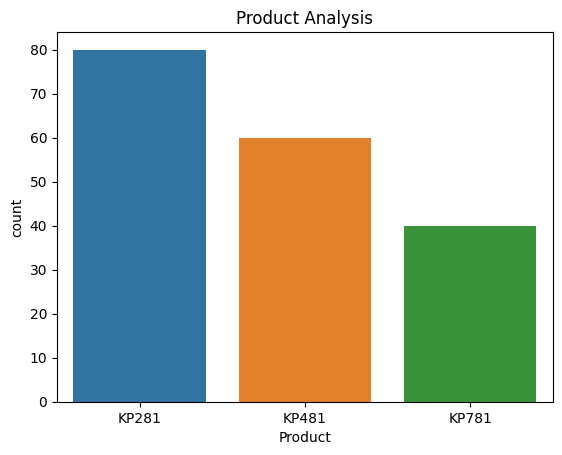

In [ ]:
# No of Product Analysis
sns.countplot(data=df,x='Product')
plt.title("Product Analysis")
plt.show()

* KP281 product type has the preference among the customers in the dataset.

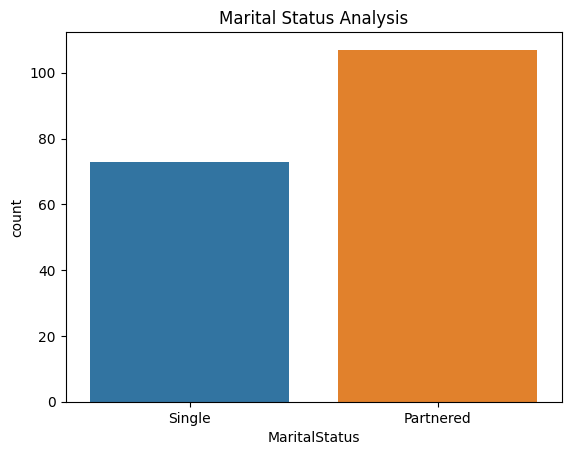

In [ ]:
# Marital Status Analysis
sns.countplot(data=df,x='MaritalStatus')
plt.title("Marital Status Analysis")
plt.show()

* More Partnered persons are there in the data.

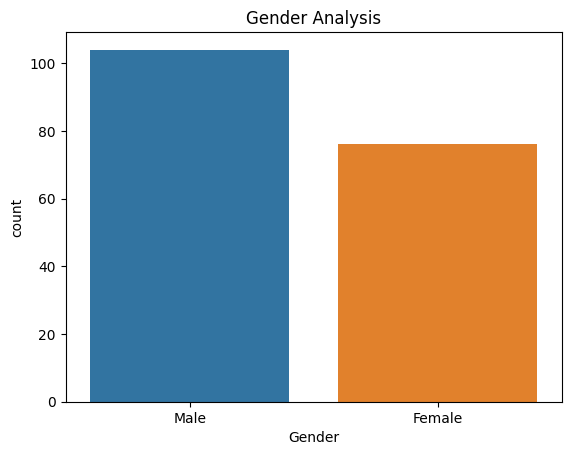

In [ ]:
# Gender Analysis - Count Plot
sns.countplot(data=df,x='Gender')
plt.title("Gender Analysis")
plt.show()

* The data consists of a greater number of males compared to females.

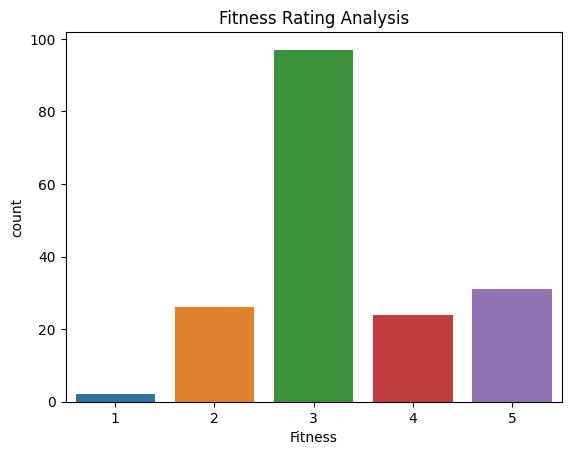

In [ ]:
# Fitness rating analysis
sns.countplot(data=df,x='Fitness')
plt.title("Fitness Rating Analysis")
plt.show()

* More than 90 customers have rated their physical fitness rating as Average
* Excellent shape is the second highest rating provided by the customers

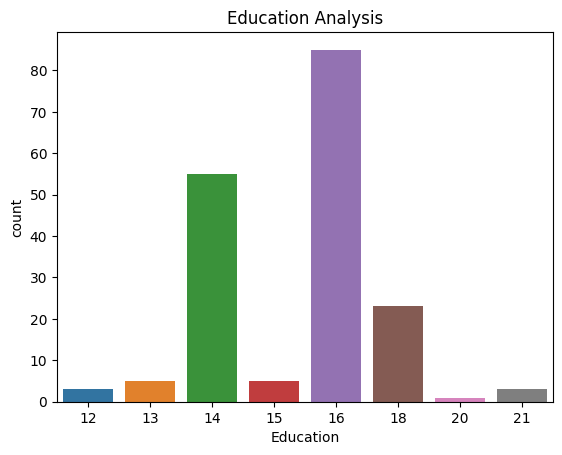

In [ ]:
# Education analysis
sns.countplot(data=df,x='Education')
plt.title("Education Analysis")
plt.show()

* The majority of customers have selected "16" as their educational background.

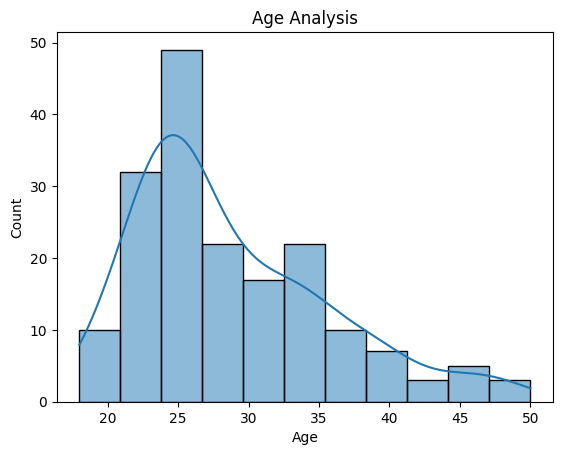

In [ ]:
# Age Analysis
sns.histplot(data=df,x='Age',kde=True)
plt.title("Age Analysis")
plt.show()

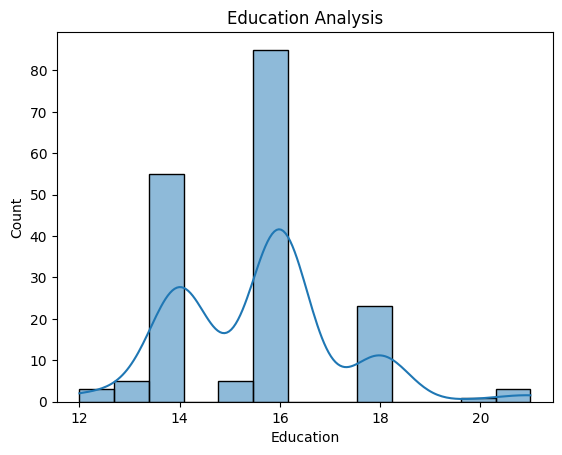

In [ ]:
# Education Analysis
sns.histplot(data=df,x='Education',kde=True)
plt.title("Education Analysis")
plt.show()

* The majority of customers have selected "16" as their educational background.

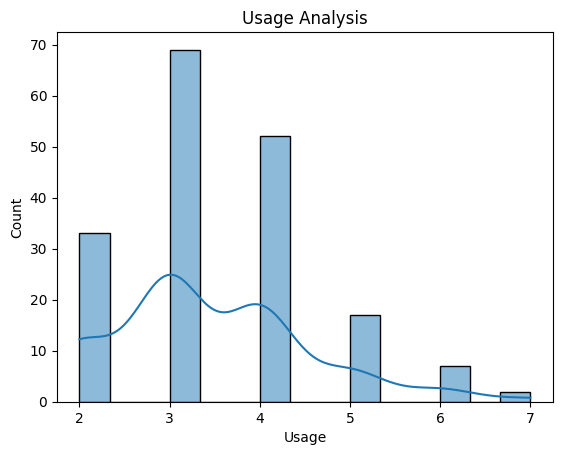

In [ ]:
# Usage Analysis
sns.histplot(data=df,x='Usage',kde=True)
plt.title("Usage Analysis")
plt.show()

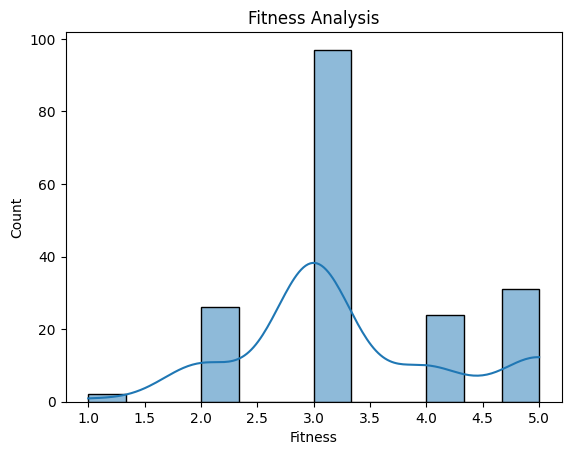

In [ ]:
# Fitness Analysis
sns.histplot(data=df,x='Fitness',kde=True)
plt.title("Fitness Analysis")
plt.show()

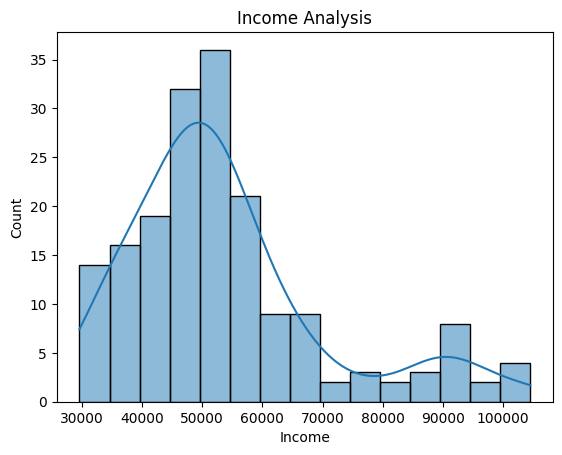

In [ ]:
# Income Analysis
sns.histplot(data=df,x='Income',kde=True)
plt.title("Income Analysis")
plt.show()

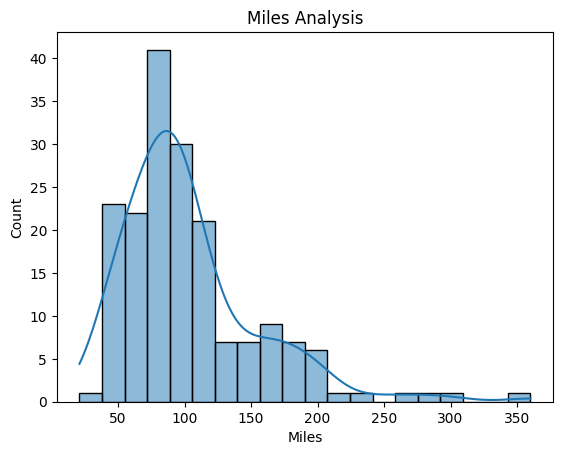

In [ ]:
# Miles Analysis
sns.histplot(data=df,x='Miles',kde=True)
plt.title("Miles Analysis")
plt.show()

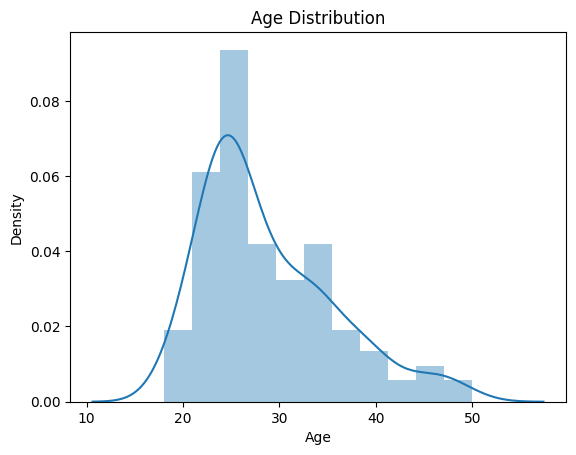

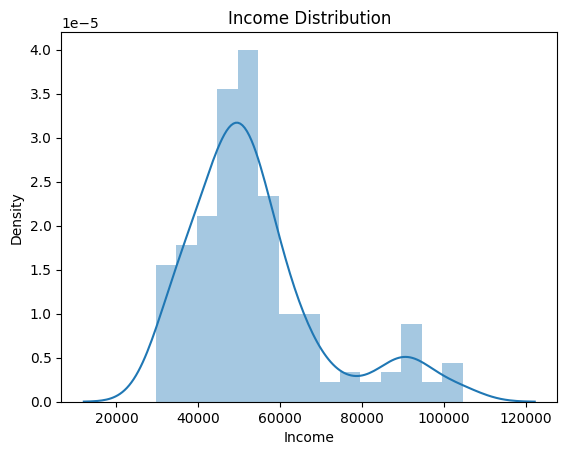

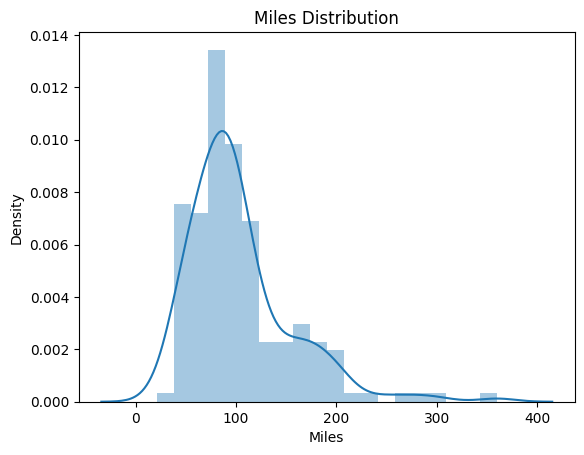

In [ ]:
# Age,Income and Miles Distribution using distplot
for col in ['Age', 'Income', 'Miles']:
    sns.distplot(df[col])
    plt.title(f'{col} Distribution')
    plt.show()

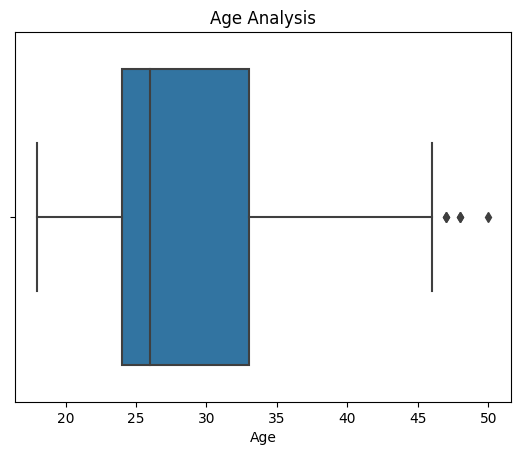

In [ ]:
# Age Analysis using box plot
sns.boxplot(data=df,x='Age')
plt.title("Age Analysis")
plt.show()

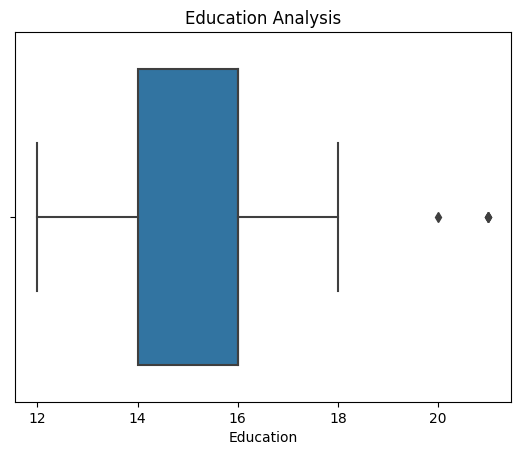

In [ ]:
# Education Analysis using box plot
sns.boxplot(data=df,x='Education')
plt.title("Education Analysis")
plt.show()

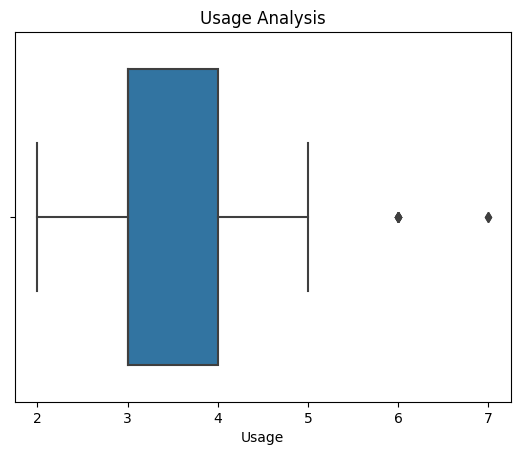

In [ ]:
# Usage Analysis using box plot
sns.boxplot(data=df,x='Usage')
plt.title("Usage Analysis")
plt.show()

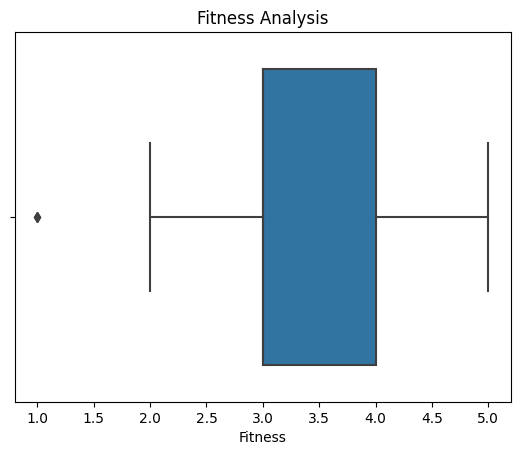

In [ ]:
# Fitness Analysis using box plot
sns.boxplot(data=df,x='Fitness')
plt.title("Fitness Analysis")
plt.show()

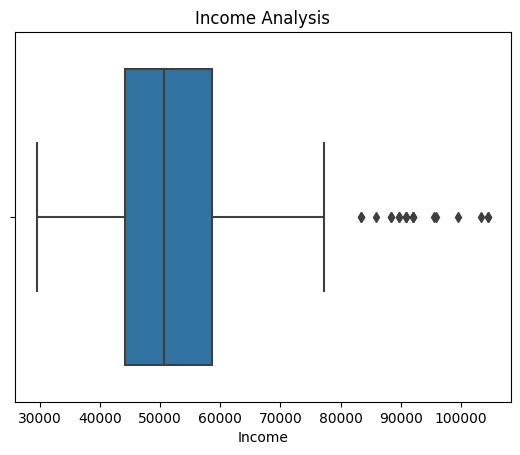

In [ ]:
# Income Analysis using box plot
sns.boxplot(data=df,x='Income')
plt.title("Income Analysis")
plt.show()

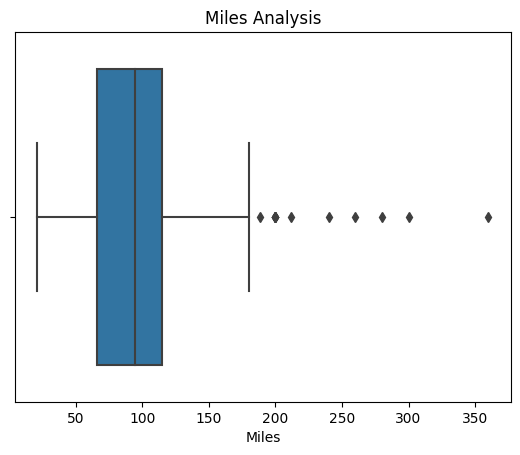

In [ ]:
# Miles Analysis using box plot
sns.boxplot(data=df,x='Miles')
plt.title("Miles Analysis")
plt.show()

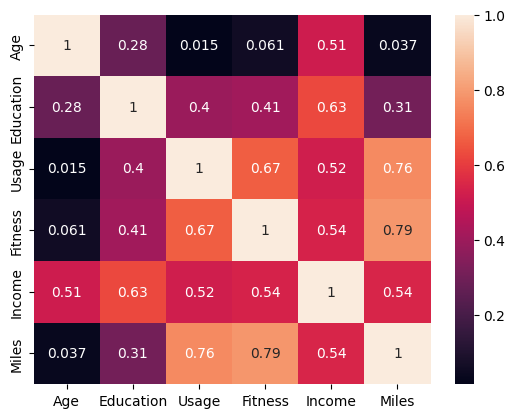

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

* We can conclude from Heatmap that Miles and Age is correlated hence we can recommend same product to customer in Education and vice versa. Similar way Ftiness and Usage.

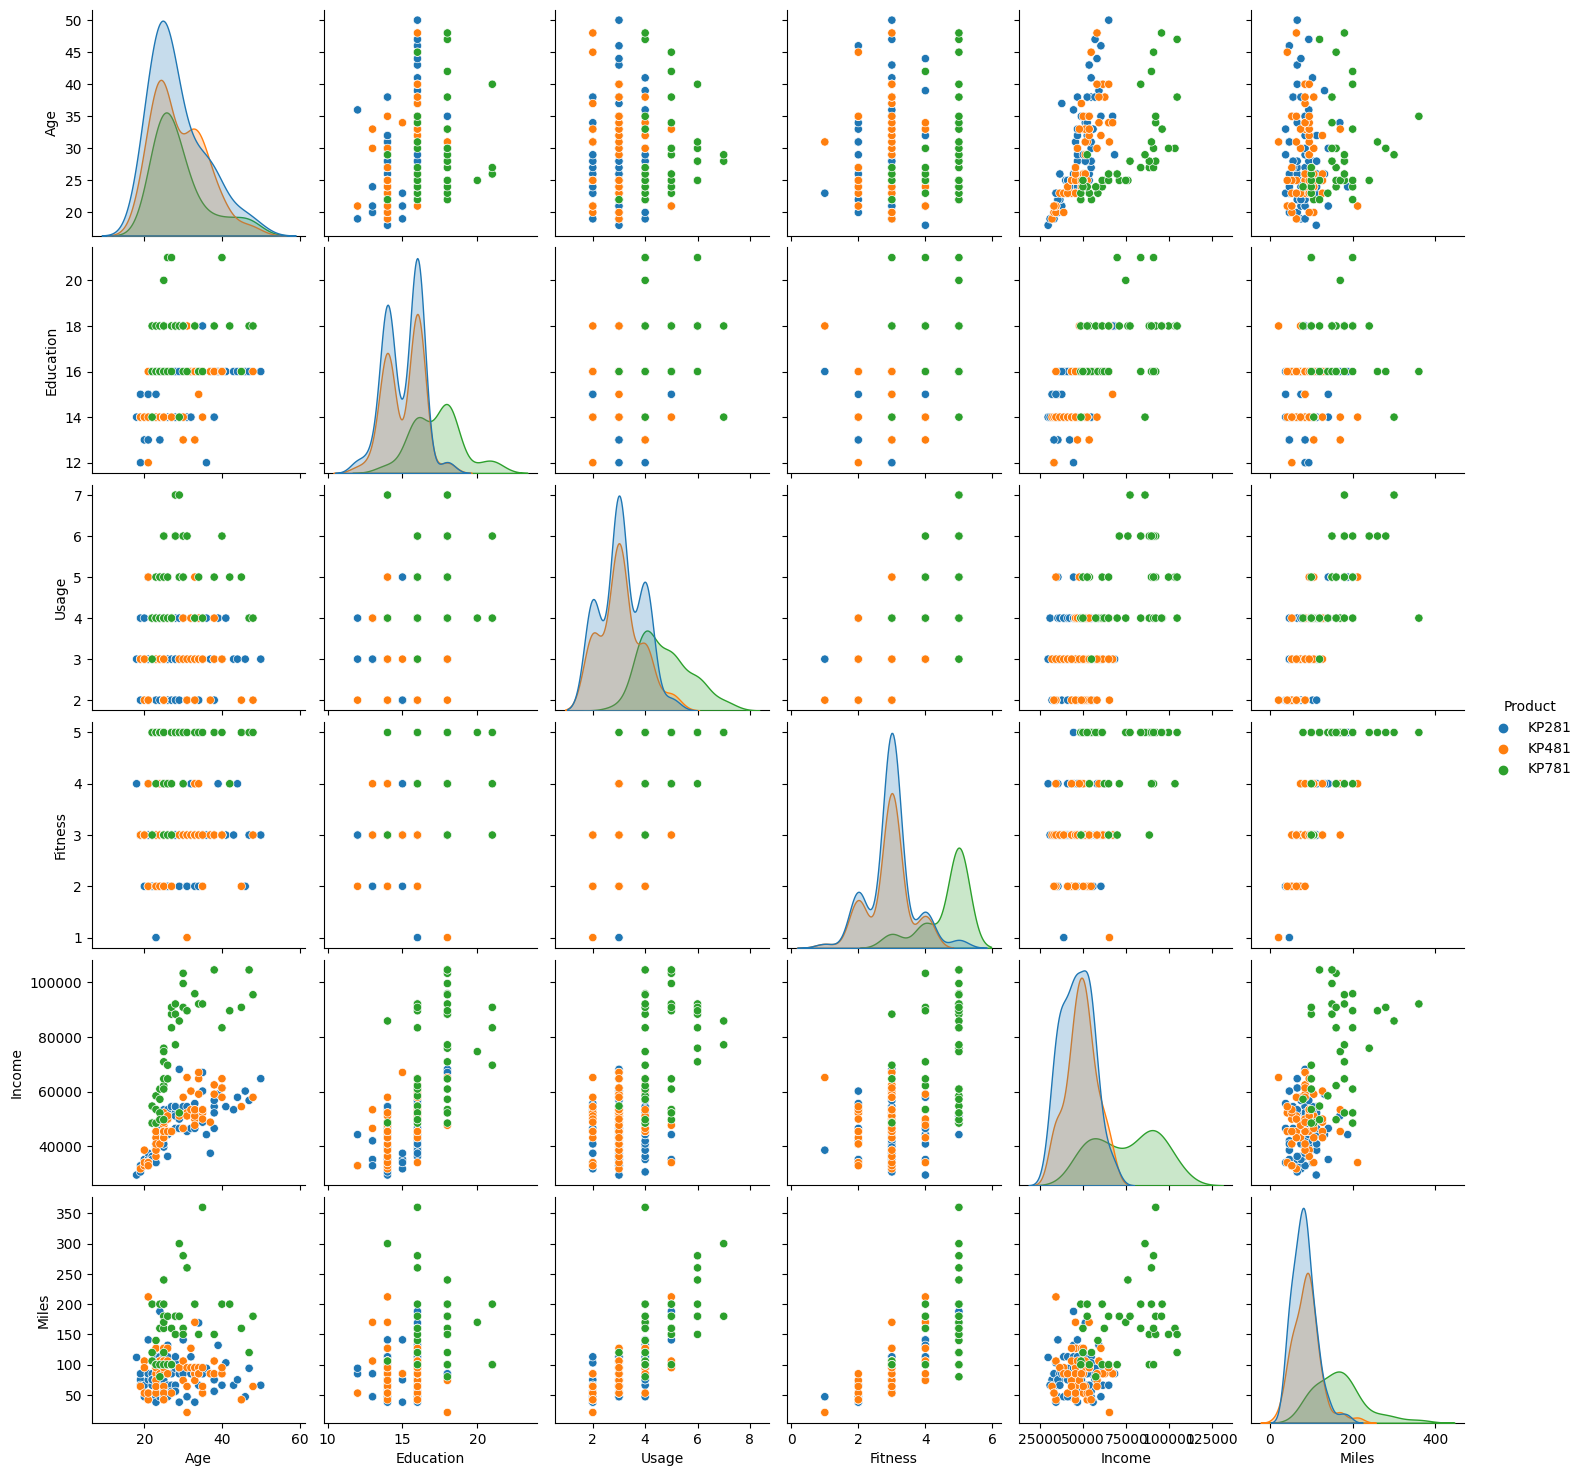

In [ ]:
sns.pairplot(df, hue ='Product')
plt.show()

* The pairplot displayed above showcases correlations between products and different attributes, and the findings align closely with our previous observations.

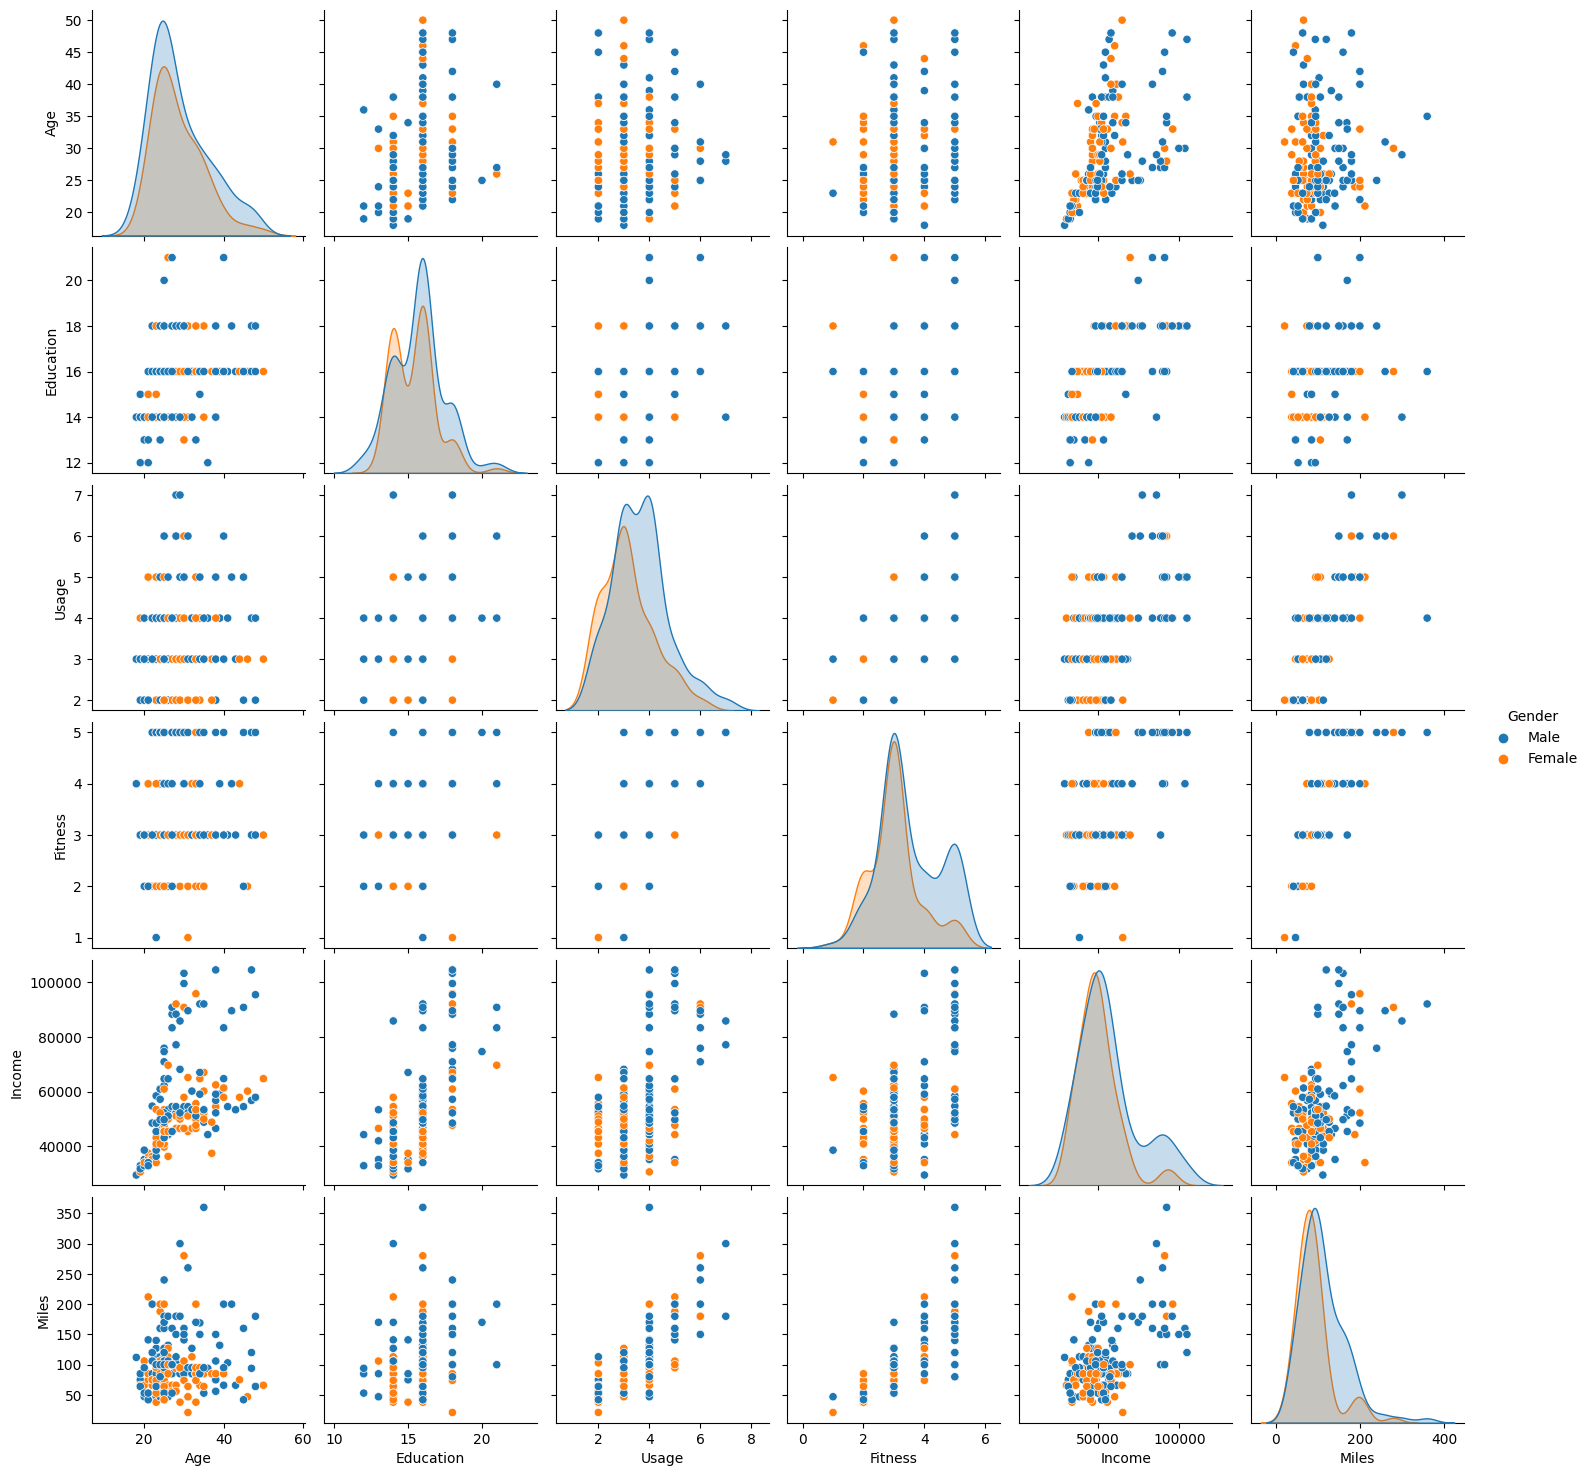

In [ ]:
sns.pairplot(df,hue='Gender')
plt.show()

* The pairplot displayed above showcases correlations between various attributes and gender status , and the findings align closely with our previous observations.

# Bivariate Analysis

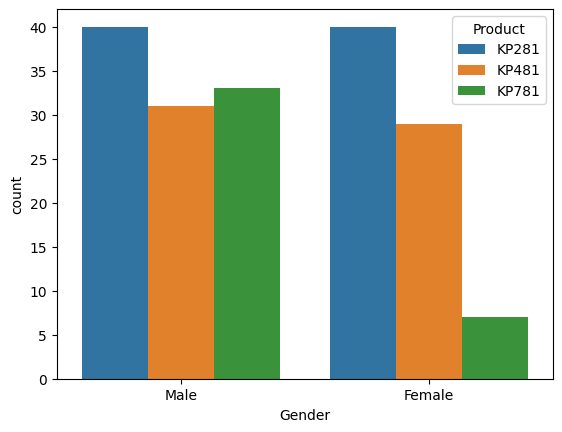

In [ ]:
sns.countplot(data=df,x='Gender',hue='Product')
plt.show()

* The countplot indicates that the product "KP281" is equally favored by both male and female customers.
* Male customers show a higher preference for the product "KP781" compared to female customers.
* The majority of product purchasers are male customers.

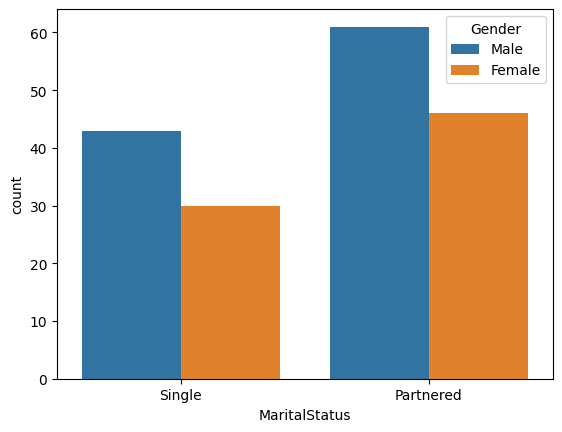

In [ ]:
sns.countplot(data=df,x='MaritalStatus',hue='Gender')
plt.show()

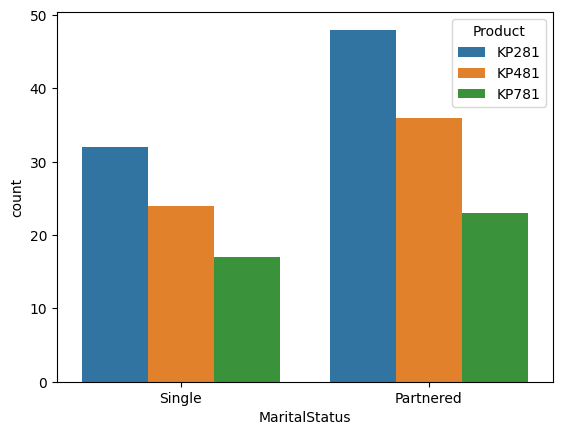

In [ ]:
sns.countplot(data=df,x='MaritalStatus',hue='Product')
plt.show()

* "KP281" stands out as the most popular product among the customers, with the highest count.
* "KP481" emerges as the second most preferred product
* "KP481" holds the second-highest position in terms of customer preference.
* The majority of product purchasers are "Partnered" customers.

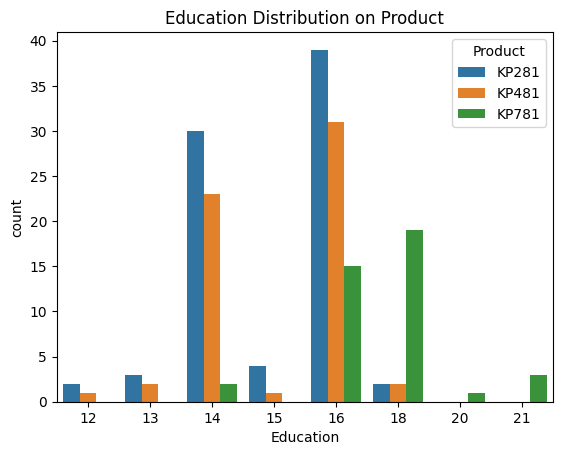

In [ ]:
sns.countplot(data=df,x='Education', hue='Product')
plt.title('Education Distribution on Product')
plt.show()

* The majority of customers with an education level between 16 tend to favor the KP281 and KP481 product type

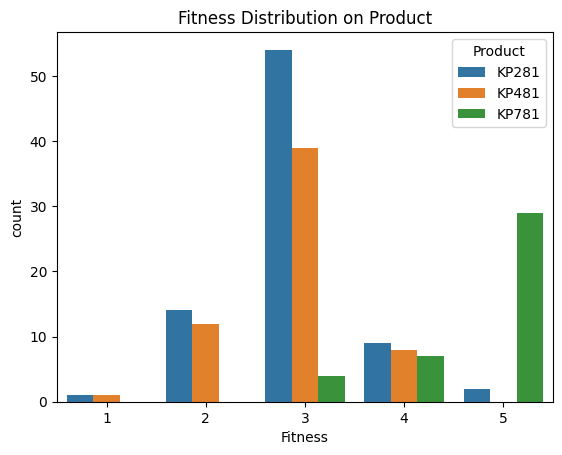

In [ ]:
sns.countplot(data=df,x='Fitness', hue='Product')
plt.title('Fitness Distribution on Product')
plt.show()

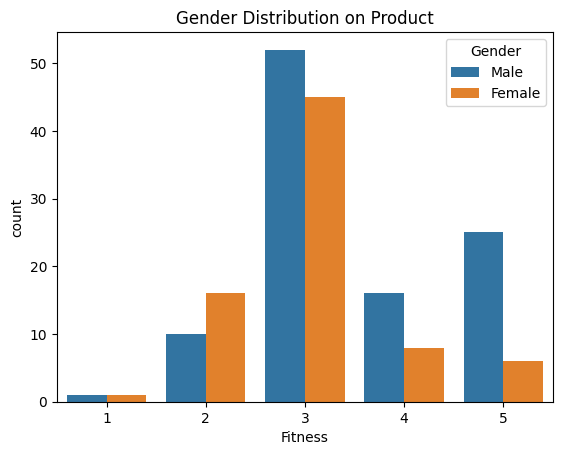

In [ ]:
sns.countplot(data=df,x='Fitness',hue='Gender')
plt.title('Gender Distribution on Product')
plt.show()

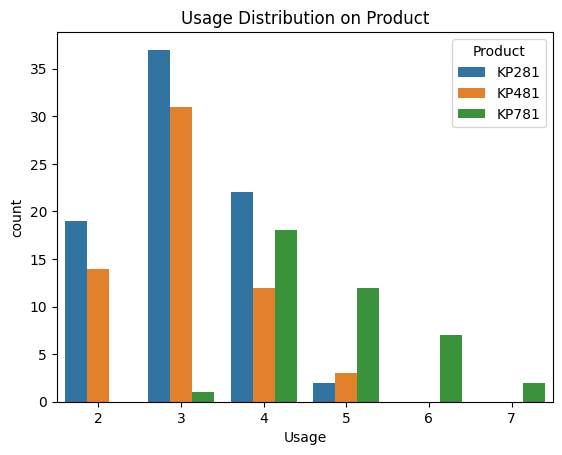

In [ ]:
sns.countplot(data=df,x='Usage', hue='Product')
plt.title('Usage Distribution on Product')
plt.show()

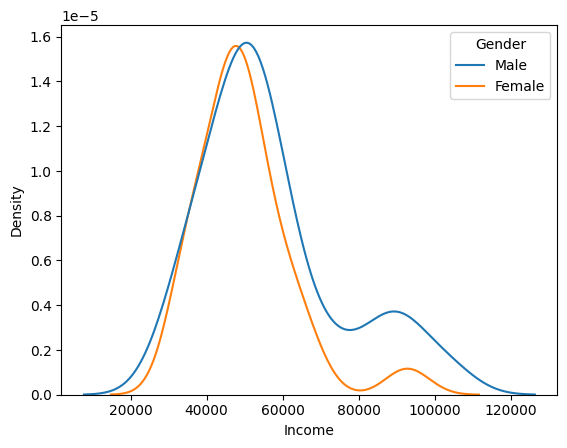

In [ ]:
sns.kdeplot(data=df,x='Income',hue='Gender')
plt.show()

* Customers with an annual income between 40,000 and 80,000 represent the largest segment of the population, based on the pronounced spike in the distribution.

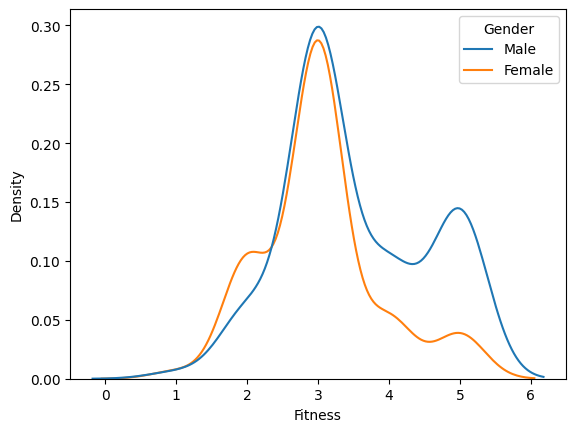

In [ ]:
sns.kdeplot(data=df,x='Fitness',hue='Gender')
plt.show()

* Male customers exhibit significantly higher usage rates compared to their female counterparts.
* Females showing a decline in consistency after the third day of the week,whereas male customers maintain higher levels of regularity.

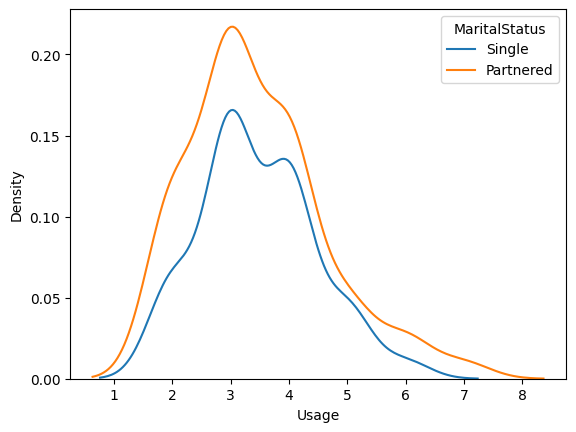

In [ ]:
sns.kdeplot(data=df,x='Usage',hue='MaritalStatus')
plt.show()

* Partnered customers usage is higher than single customers

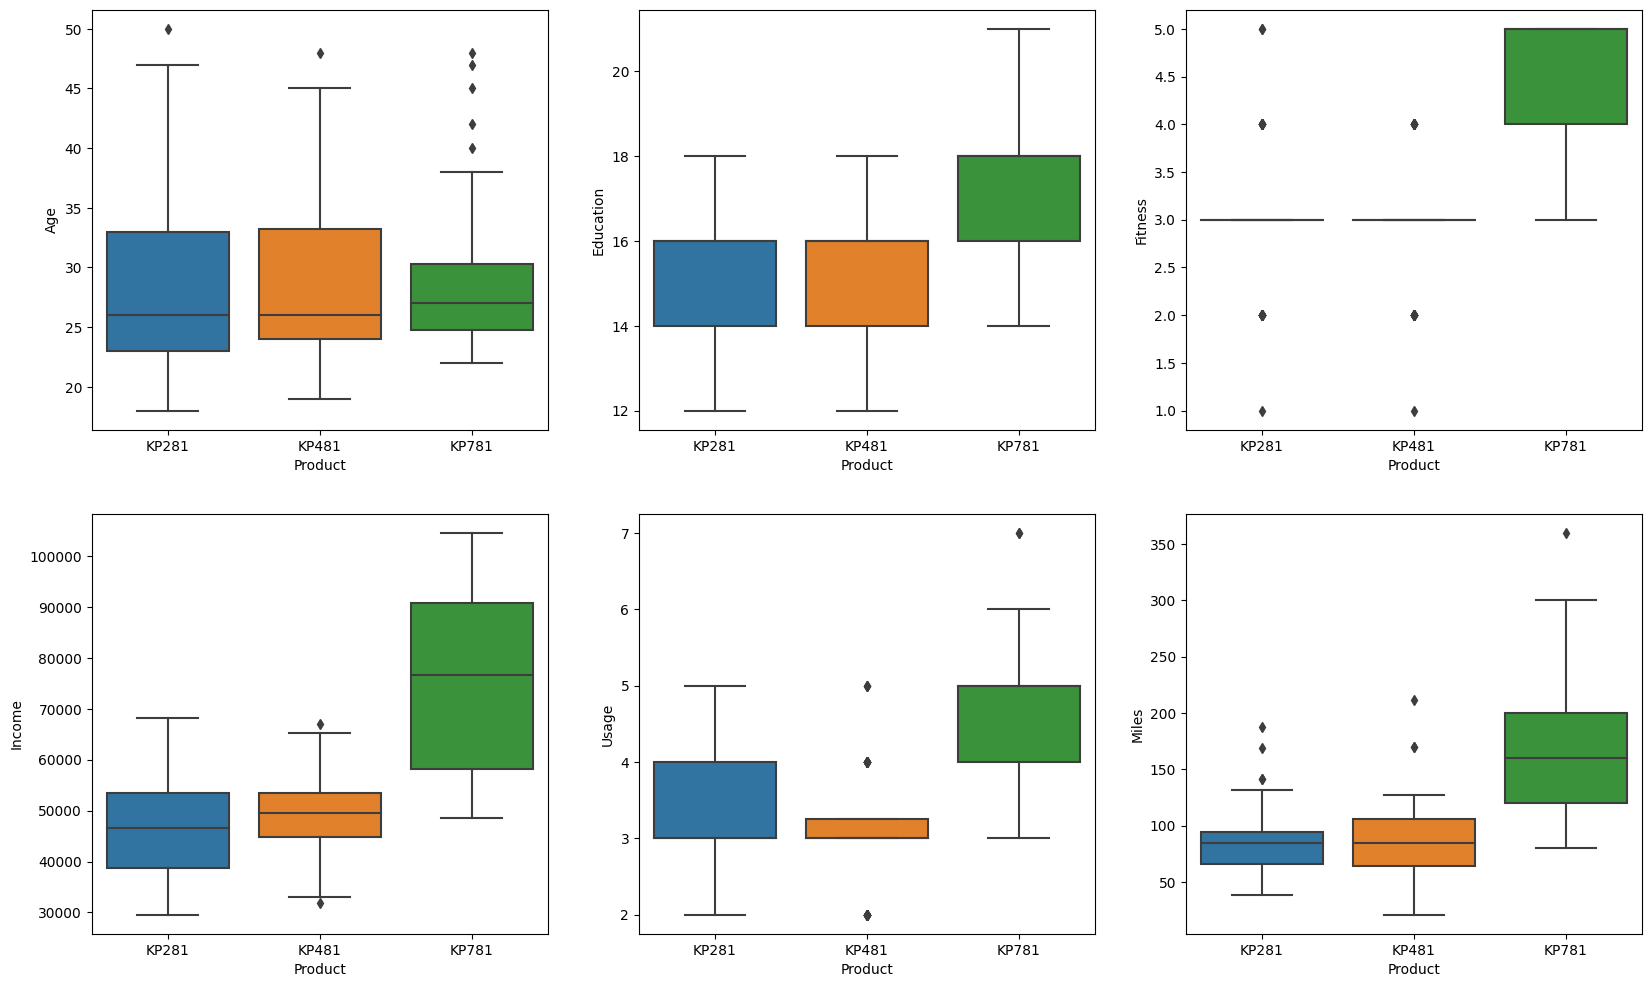

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2, 3, 1)
sns.boxplot(data=df,x='Product', y='Age')

plt.subplot(2, 3, 2)
sns.boxplot(data=df,x='Product', y='Education')

plt.subplot(2, 3, 3)
sns.boxplot(data=df,x='Product', y='Fitness')

plt.subplot(2, 3, 4)
sns.boxplot(data=df,x='Product', y='Income')

plt.subplot(2, 3, 5)
sns.boxplot(data=df,x='Product', y='Usage')

plt.subplot(2, 3, 6)
sns.boxplot(data=df,x='Product', y='Miles')

plt.show()

**Product vs Age :**
* A small proportion of customers use the KP781 product.
* The majority of customers preference for the KP281 product type, indicating a higher level of comfort.
* The younger segment of customers, the KP481 product emerges as the second most popular choice.

**Product vs Education :**
* The majority of customers with an education level between 16 to 18 tend to favor the KP781 product type
* customers with an education level between 14 to 16 exhibit an equal preference for both the KP281 and KP481 products.

**Product vs Fitness :**
* Customers who are in excellent shape predominantly choose the KP781 product
* While both KP481 and KP281 products are chosen by customers with different fitness ratings.

**Product vs Income :**
* The majority of customers preference for the KP781 income type
* The second highest income is observed for customers using KP281 product.

**Product vs Usage :**
* KP781 product usage is higher than the other product usage
* The second highest usage is observed for customers using KP281 product.

**Product vs Miles :**
* Customers who have selected product KP781 have recorded higher mileage compared to the other two product types.
* The second highest mileage is observed for customers using KP481 product.
* KP281 product mileage is comparatively less when compared to KP781 and KP481 customers.

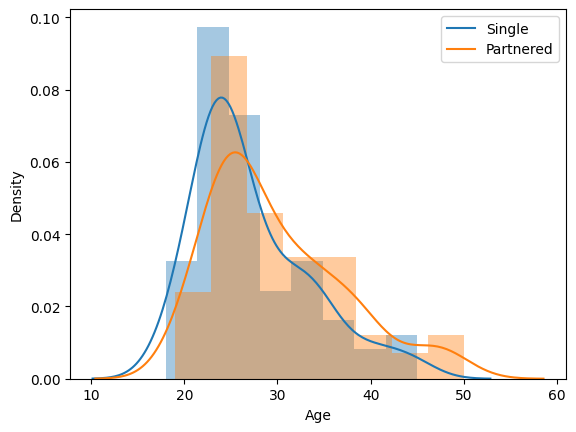

In [ ]:
single = df[df['MaritalStatus']=='Single']
married = df[df['MaritalStatus']=='Partnered']
sns.distplot(x=single['Age'])
sns.distplot(x=married['Age'])
plt.legend(['Single', 'Partnered'])
plt.xlabel('Age')
plt.show()

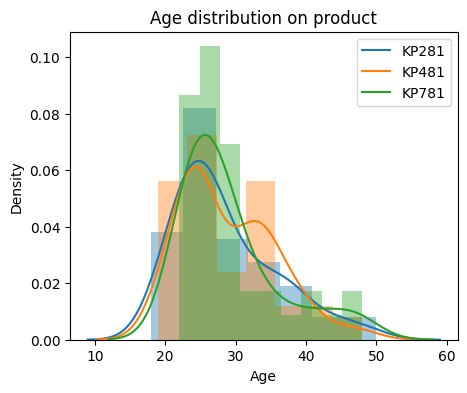

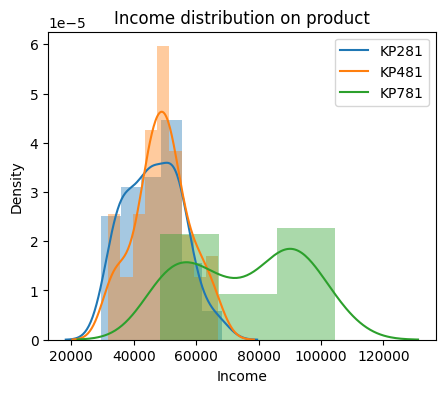

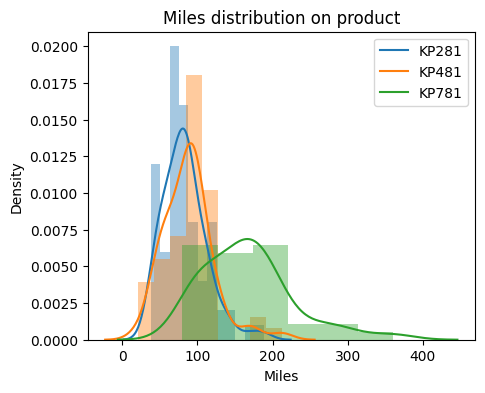

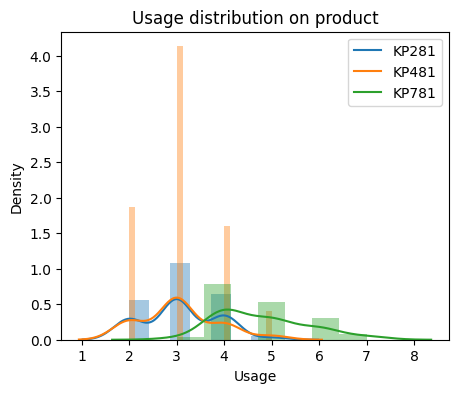

In [ ]:
for col in ['Age', 'Income', 'Miles','Usage']:
    plt.figure(figsize=(5,4))
    kp281 = df[df['Product']=='KP281']
    kp481 = df[df['Product']=='KP481']
    kp781 = df[df['Product']=='KP781']
    sns.distplot(kp281[col])
    sns.distplot(kp481[col])
    sns.distplot(kp781[col])
    plt.legend(['KP281', 'KP481', 'KP781'])
    plt.title(f'{col} distribution on product')
    plt.show()

In [ ]:
df['Product'].value_counts(normalize=True).round(2)

KP281    0.44
KP481    0.33
KP781    0.22
Name: Product, dtype: float64

In [ ]:
pd.crosstab(df['Product'],[df['Gender']], normalize=True, margins=True, margins_name='Total').round(2)

Gender,Female,Male,Total
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
Total,0.42,0.58,1.00


In [ ]:
pd.crosstab(df['Product'],[df['MaritalStatus']], normalize=True, margins=True, margins_name='Total').round(2)

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
Total,0.59,0.41,1.00


In [ ]:
pd.crosstab(df['Product'],[df['Fitness_category']], normalize=True, margins=True, margins_name='Total').round(2)

Fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape,Total
Product,,,,,,
KP281,0.30,0.08,0.01,0.05,0.01,0.44
KP481,0.22,0.07,0.00,0.04,0.01,0.33
KP781,0.02,0.00,0.16,0.04,0.00,0.22
Total,0.54,0.14,0.17,0.13,0.01,1.00


In [ ]:
pd.crosstab(df['Product'],[df['Education']], normalize=True, margins=True, margins_name='Total').round(2)

Education,12,13,14,15,16,18,20,21,Total
Product,,,,,,,,,
KP281,0.01,0.02,0.17,0.02,0.22,0.01,0.00,0.00,0.44
KP481,0.01,0.01,0.13,0.01,0.17,0.01,0.00,0.00,0.33
KP781,0.00,0.00,0.01,0.00,0.08,0.11,0.01,0.02,0.22
Total,0.02,0.03,0.31,0.03,0.47,0.13,0.01,0.02,1.00


In [ ]:
pd.crosstab(df['Product'],[df['Usage']], normalize=True, margins=True, margins_name='Total').round(2)

Usage,2,3,4,5,6,7,Total
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
Total,0.18,0.38,0.29,0.09,0.04,0.01,1.00


In [ ]:
pd.crosstab(df['Product'],[df['Miles']], normalize=True, margins=True, margins_name='Total').round(2)

Miles,21,38,42,47,53,56,64,66,74,75,...,180,188,200,212,240,260,280,300,360,Total
Product,,,,,,,,,,,,,,,,,,,,,
KP281,0.00,0.02,0.00,0.05,0.00,0.03,0.00,0.06,0.00,0.06,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.44
KP481,0.01,0.00,0.02,0.00,0.04,0.00,0.03,0.00,0.02,0.00,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.33
KP781,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.00,0.03,0.00,0.01,0.01,0.01,0.01,0.01,0.22
Total,0.01,0.02,0.02,0.05,0.04,0.03,0.03,0.06,0.02,0.06,...,0.03,0.01,0.03,0.01,0.01,0.01,0.01,0.01,0.01,1.00


In [ ]:
pd.crosstab(index=[df.Product,df.Fitness_category],columns=df.Gender,normalize=True, margins=True, margins_name='Total').round(2)

Gender                    Female  Male  Total
Product Fitness_category                     
KP281   Average Shape       0.14  0.16   0.30
        Bad Shape           0.06  0.02   0.08
        Excellent Shape     0.01  0.01   0.01
        Good Shape          0.02  0.03   0.05
        Poor Shape          0.00  0.01   0.01
KP481   Average Shape       0.10  0.12   0.22
        Bad Shape           0.03  0.03   0.07
        Good Shape          0.02  0.02   0.04
        Poor Shape          0.01  0.00   0.01
KP781   Average Shape       0.01  0.02   0.02
        Excellent Shape     0.03  0.13   0.16
        Good Shape          0.01  0.03   0.04
Total                       0.42  0.58   1.00

In [ ]:
pd.crosstab(index=[df.Product,df.MaritalStatus],columns=df.Gender,normalize=True,margins=True, margins_name='Total').round(2)

Gender                 Female  Male  Total
Product MaritalStatus                     
KP281   Partnered        0.15  0.12   0.27
        Single           0.07  0.11   0.18
KP481   Partnered        0.08  0.12   0.20
        Single           0.08  0.06   0.13
KP781   Partnered        0.02  0.11   0.13
        Single           0.02  0.08   0.09
Total                    0.42  0.58   1.00

# Summary :-
**KP281 :-**
* KP281 is the most affordable and entry-level product, making it the highest-selling model among all the options.
* Both male and female customers show equal preference for this product
* An almost equal number of users from each gender.
* Customers using KP281 typically cover an average of 70 to 90 miles by walking or running per week.
* Most commonly used 3 to 4 times a week by customers.
* Users of KP281 generally have an average fitness level and are in average shape.
* More general purpose for all age group and fitness levels.

**KP481 :-**
* KP481 falls into the intermediate price range among the products.
* Customers prefer KP481 when they intend to use it less frequently but cover more miles per week.
* Customers using KP281 typically cover an average of 70 to 130 miles by walking or running per week.
* The probability of selling KP481 is higher among female customers compared to male customers.
* Probability of Female customer buying KP481 is significantly higher than male.
* KP481 is particularly recommended for female customers who are intermediate users.
* KP481 consists of adults, teens, and individuals in mid-age categories.

**KP781 :-**
* KP781 is the least sold product among the three options, primarily due to its high price and extensive usage requirements.
* Customers using KP281 typically cover an average of 120 to 200 miles by walking or running per week.
* Most commonly used 4 to 5 times a week by customers.
* There is a strong correlation between using KP781 and having an excellent fitness shape, with a probability of more than 90% for individuals in excellent shape to use this product.
* Female customers who run an average of 180 miles, engaging in extensive exercise, are more likely to use KP781 compared to male customers.
* KP781 is recommended for female customers who engage in extensive exercises.
* The probability of male customers purchasing KP781 is higher 31.73% compared to female customers 9.21%.
* The customer base for KP781 consists mostly of older adults above the age of 45.

**Recommendations :**

* KP781 is recommended for users who exercise/run more frequently, cover more miles, and have a higher income. It is a suitable choice for individuals who are planning to upgrade from KP481 and engage in intermediate to extensive exercise. Also the targeted Age Category is Adult and age above 45.
* KP481 is specifically recommended for female customers who engage in more extensive running/walking routines, as the data shows a higher probability. The statistical summary regarding fitness level and mileage for KP481 is not as impressive as for KP281, which is a cheaper alternative. Therefore, it is advisable to make necessary changes to improve the product experience of KP481.
* 44% customers purchased KP281 and 37% purchased KP481.So company should pay more attention to these products.
* Customers whose average annual income exceeds 70,000(in dollars) exhibit a greater commitment to maintaining their fitness. This indicates a strong correlation between financial stability and a focus on health and well-being. Therefore, the company should consider targeting customers with an income above 70,000(in dollars) for its fitness products.
* 44% couples purchased KP281, 33% purchased KP481 and 21% purchased KP781
* 43% singles purchased KP281, 32% purchased KP481 and 23% purchased KP781